**PHẦN QUAN TRỌNG NHẤT NẰM Ở CUỐI NHÉ**

# Test thử hàm vẽ BB của Hà



In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Just for testing, if u wanna test -> change the dir to ur repo's location like this.
# os.chdir(r"D:\Documents\GitHub\NomOCR")

In [7]:
# READ IMAGES IN COLORED FORMAT
def read_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

# PLOT BB TO DEBUG
def plot_BB(image_path, coord_path):
    image = read_image(image_path)

    with open(coord_path, "r") as f:
        coordinates = [line.strip().split()[1:] for line in f.readlines()]

    plt.imshow(image)
    for coord in coordinates:
        # Split the coordinates
        x_upper_left, y_upper_left, x_below_right, y_below_right = map(float, coord)
        x = x_upper_left
        y = y_upper_left
        w = x_below_right - x_upper_left
        h = y_below_right - y_upper_left
        # Scale the coordinates to the image dimensions
        x *= image.shape[1]
        y *= image.shape[0]
        w *= image.shape[1]
        h *= image.shape[0]
        # Convert coordinates to integers
        x, y, w, h = map(int, (x, y, w, h))

        rect_box = plt.Rectangle((x, y), w, h, color='red', fill=False, lw=3)
        plt.gca().add_patch(rect_box)

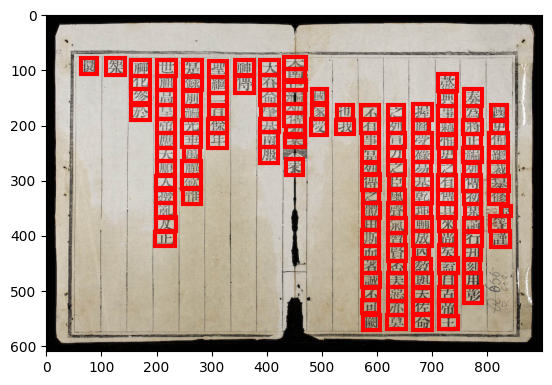

In [8]:
img_dir = "wb_localization_dataset/images/train/nlvnpf-0137-01-001.jpg"
coord_dir = "labels_new/train/nlvnpf-0137-01-001.txt"
plot_BB(img_dir, coord_dir)

# Phân tích data

##Thống kê chung về các chỉ số của các ảnh con trong 70 ảnh to

In [9]:
def cal_overall_stat(labels_folder):
  overall_stat = []
  for filename in os.listdir(labels_folder):
    if filename.endswith(".txt"):
        label_file = os.path.join(labels_folder, filename)
        with open(label_file, "r") as f:
            coordinates = [line.strip().split()[1:] for line in f.readlines()]

            for coord in coordinates:
                # Split the coordinates
                x_upper_left, y_upper_left, x_below_right, y_below_right = map(float, coord)
                x = x_upper_left
                y = y_upper_left
                w = x_below_right - x_upper_left
                h = y_below_right - y_upper_left
                area = h * w

                char_dat = [x, y, w, h, area]
                overall_stat.append(char_dat)
  return np.array(overall_stat)

In [10]:
overall_stat = cal_overall_stat("labels_new/train")
overall_stat.shape

(13818, 5)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frequency_histogram(arr, name):
    # Đếm tần suất xuất hiện của các số
    unique_values, counts = np.unique(arr, return_counts=True)

    # Sắp xếp các số theo thứ tự tăng dần
    sorted_indices = np.argsort(unique_values)
    sorted_values = unique_values[sorted_indices]
    sorted_counts = counts[sorted_indices]

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_values, sorted_counts)
    plt.xlabel(name)
    plt.ylabel('Tần suất xuất hiện')
    plt.title('Biểu đồ tần suất xuất hiện của biến ' + name)

    # # Chỉ đánh dấu các điểm nhất định trên trục x
    # ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    # plt.xticks(ticks)

    plt.show()

Hàm tính thống kế 1 biến

In [12]:
def cal_stat_var(overall, num_val, name):
  var = overall[:, num_val]
  plot_frequency_histogram(var, name)

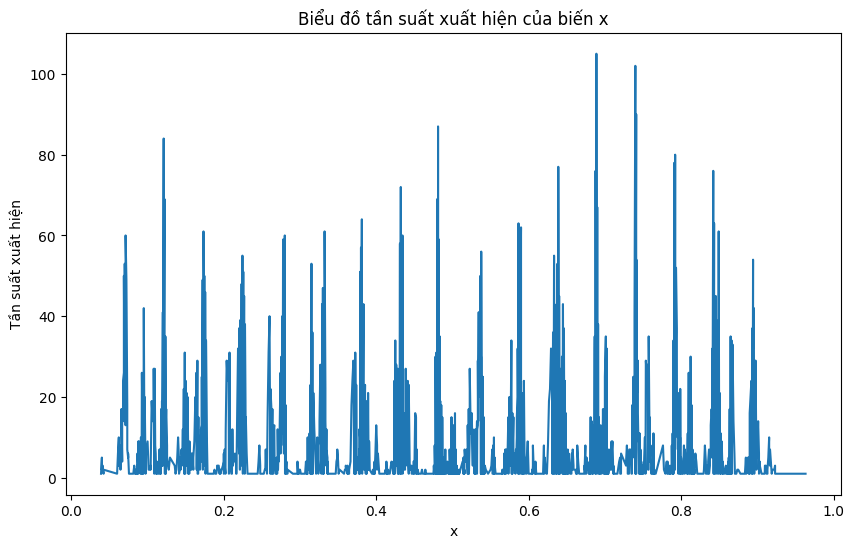

In [13]:
cal_stat_var(overall_stat, 0, "x")

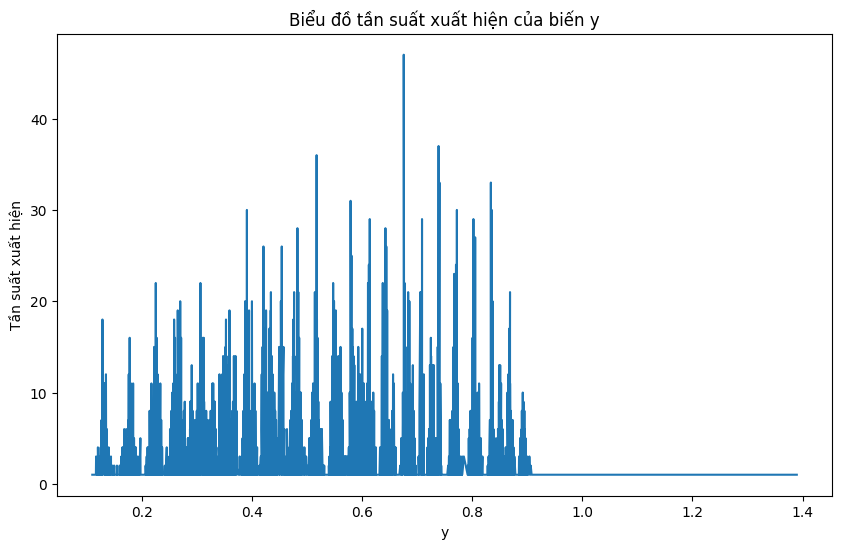

In [14]:
cal_stat_var(overall_stat, 1, "y")

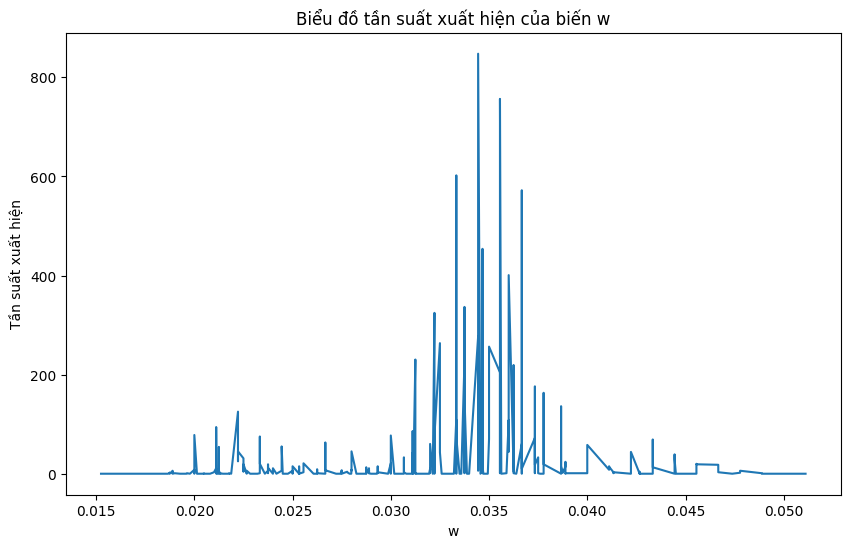

In [15]:
cal_stat_var(overall_stat, 2, "w")

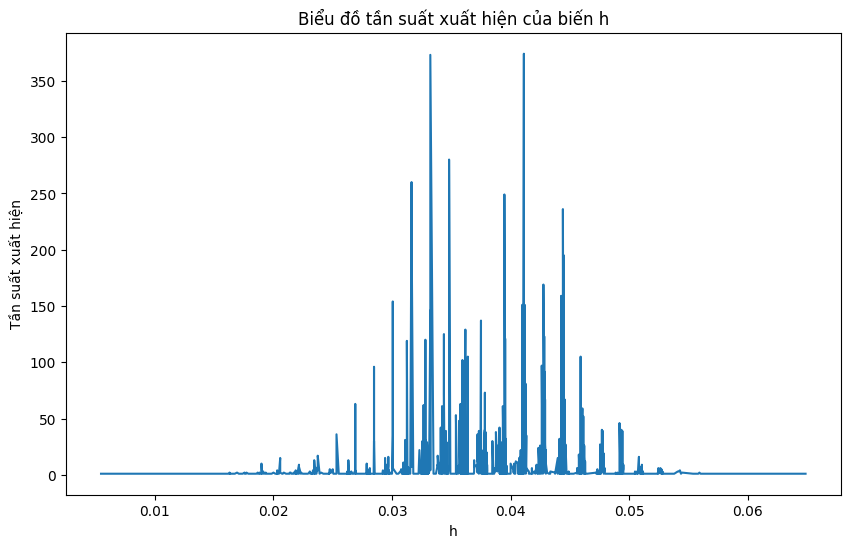

In [16]:
cal_stat_var(overall_stat, 3, "h")

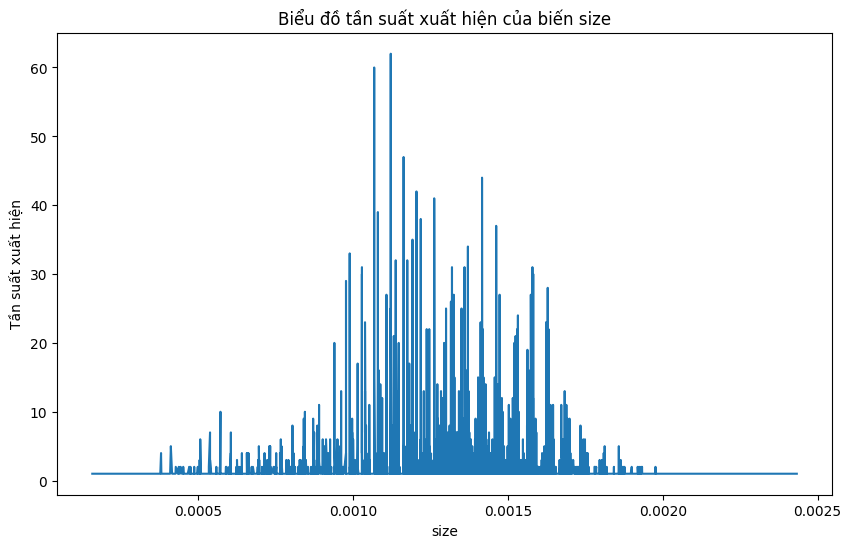

In [17]:
cal_stat_var(overall_stat, 4, "size")

##Xem data trên 1 ảnh

In [18]:
def cal_pic_statics(coord_path):
  with open(coord_path, "r") as f:
      coordinates = [line.strip().split()[1:] for line in f.readlines()]

  pic_dat = []
  for coord in coordinates:
      # Split the coordinates
      x_upper_left, y_upper_left, x_below_right, y_below_right = map(float, coord)
      x = x_upper_left
      y = y_upper_left
      w = x_below_right - x_upper_left
      h = y_below_right - y_upper_left
      area = h * w
      char_dat = [x, y, w, h, area]
      pic_dat.append(char_dat)
  return np.array(pic_dat)

ở đây có 149 hàng mỗi hàng có 5 phần tử

In [19]:
pic_data = cal_pic_statics("labels_new/train/nlvnpf-0137-01-001.txt")
pic_data.shape

(149, 5)

xem thử pic_data có gì

In [20]:
pic_data[0][1]

0.313115

In [21]:
pic_data

array([[8.96666000e-01, 3.13115000e-01, 3.33330000e-02, 3.93440000e-02,
        1.31145355e-03],
       [4.80000000e-01, 1.26229000e-01, 4.44440000e-02, 3.60660000e-02,
        1.60291730e-03],
       [6.87778000e-01, 3.09836000e-01, 3.44440000e-02, 4.09840000e-02,
        1.41165290e-03],
       [7.40000000e-01, 6.00000000e-01, 3.66670000e-02, 4.42620000e-02,
        1.62295475e-03],
       [3.28888000e-01, 1.81968000e-01, 3.66670000e-02, 4.75410000e-02,
        1.74318585e-03],
       [3.28888000e-01, 1.34427000e-01, 3.66670000e-02, 4.75410000e-02,
        1.74318585e-03],
       [3.80000000e-01, 1.34426000e-01, 3.77780000e-02, 4.59020000e-02,
        1.73408576e-03],
       [7.40000000e-01, 6.44262000e-01, 3.66670000e-02, 4.26240000e-02,
        1.56289421e-03],
       [7.93334000e-01, 6.42622000e-01, 3.33330000e-02, 4.26240000e-02,
        1.42078579e-03],
       [7.40000000e-01, 7.26229000e-01, 3.55560000e-02, 4.26240000e-02,
        1.51553894e-03],
       [3.80000000e-01, 1.8032

#Đánh giá trong tập val



In [22]:
overall_stat_val = cal_overall_stat("labels_new/val")
overall_stat_val.shape

(1956, 5)

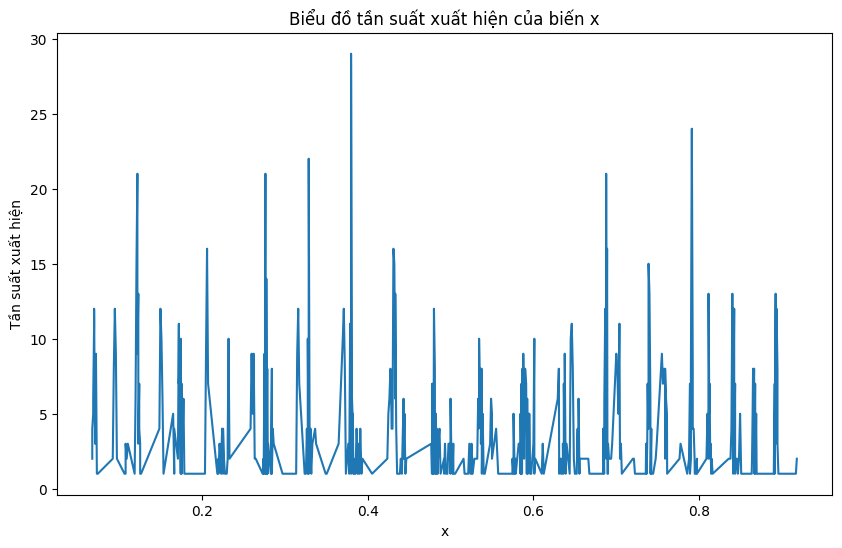

In [23]:
cal_stat_var(overall_stat_val, 0, "x")

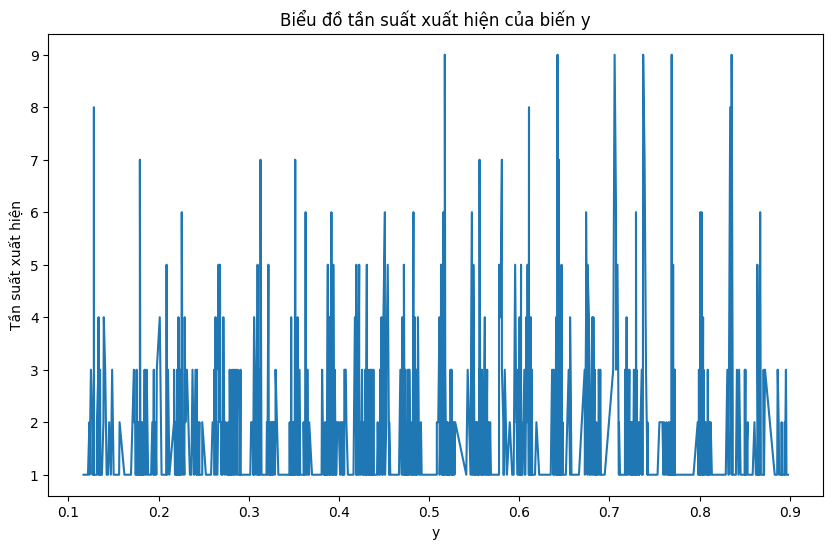

In [24]:
cal_stat_var(overall_stat_val, 1, "y")

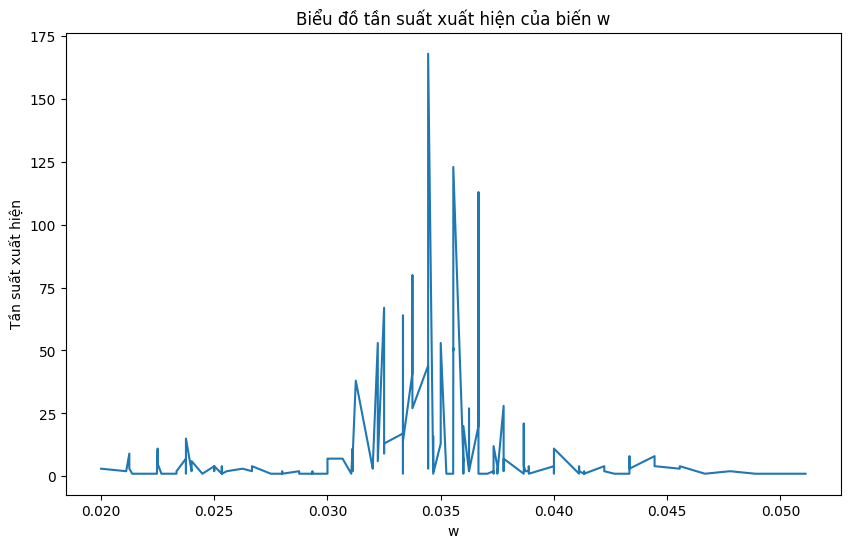

In [25]:
cal_stat_var(overall_stat_val, 2, "w")

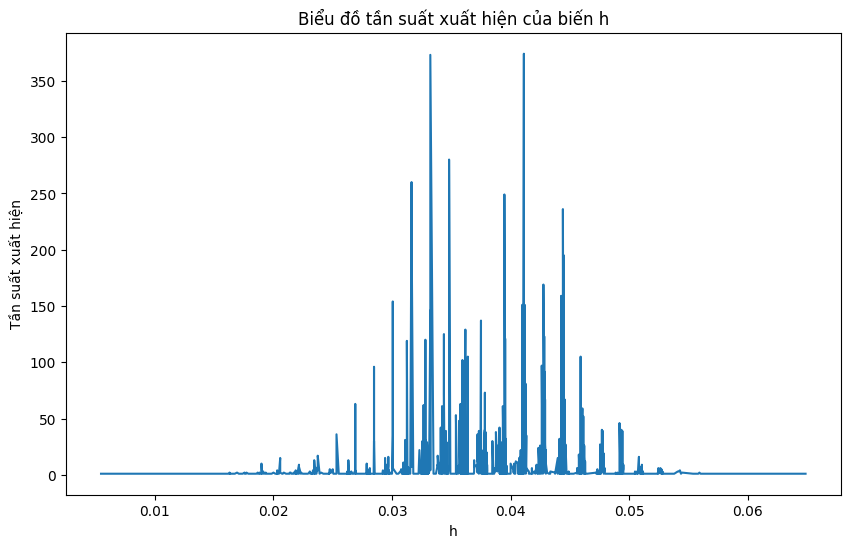

In [26]:
cal_stat_var(overall_stat, 3, "h")

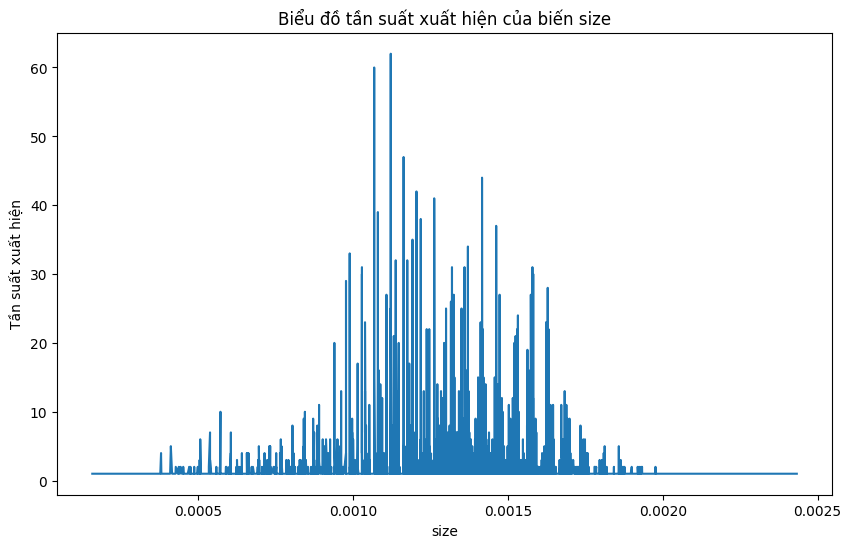

In [27]:
cal_stat_var(overall_stat, 4, "size")

##bắt đầu đi tính thống kê tất cả trong label train

hàm này sẽ trả về 5 cái variance ứng với 5 loại x, y, w, h, area. Mỗi row sẽ chứa variance của từng ảnh

In [28]:
def cal_labels_statis(labels_folder):
  overall_statis = []
  for filename in os.listdir(labels_folder):
    if filename.endswith(".txt"):
        label_file = os.path.join(labels_folder, filename)
        with open(label_file, "r") as f:
            coordinates = [line.strip().split()[1:] for line in f.readlines()]
            pic_dat = []
            for coord in coordinates:
                # Split the coordinates
                x_upper_left, y_upper_left, x_below_right, y_below_right = map(float, coord)
                x = x_upper_left
                y = y_upper_left
                w = x_below_right - x_upper_left
                h = y_below_right - y_upper_left
                area = h * w

                char_dat = [x, y, w, h, area]
                pic_dat.append(char_dat)
            pic_dat = np.array(pic_dat)

            #Cal statistical values - variance
            x_dis = pic_dat[:, 0]
            x_var = np.var(x_dis)

            y_dis = pic_dat[:, 1]
            y_var = np.var(y_dis)

            s_w = pic_dat[:, 2]
            w_var = np.var(s_w)

            s_h = pic_dat[:, 3]
            h_var = np.var(s_h)

            s_area = pic_dat[:, 4]
            area_var = np.var(s_area)

            pic_var = [x_var, y_var, w_var, h_var, area_var]
            overall_statis.append(pic_var)
  return np.array(overall_statis)


In [29]:
label_stat = cal_labels_statis("labels_new/train")
label_stat.shape

(71, 5)

In [30]:
# Create the index column
index_col = np.arange(label_stat.shape[0])
# Add the index column to the array
label_stat = np.column_stack((index_col, label_stat))

label_stat.shape

(71, 6)

In [31]:
label_stat[:5]

array([[0.00000000e+00, 5.30240546e-02, 4.49057315e-02, 7.08254206e-06,
        1.41792990e-05, 3.20175992e-08],
       [1.00000000e+00, 5.75274943e-02, 4.23326530e-02, 7.71393231e-06,
        1.47248881e-05, 2.89389796e-08],
       [2.00000000e+00, 3.29852498e-02, 3.59314252e-02, 1.02817729e-05,
        1.64503513e-05, 3.65214279e-08],
       [3.00000000e+00, 2.11801616e-02, 5.59487967e-02, 4.96167028e-05,
        4.01222463e-05, 1.49621768e-07],
       [4.00000000e+00, 4.46056264e-02, 4.55506235e-02, 2.14745042e-05,
        3.33317963e-05, 1.04012186e-07]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


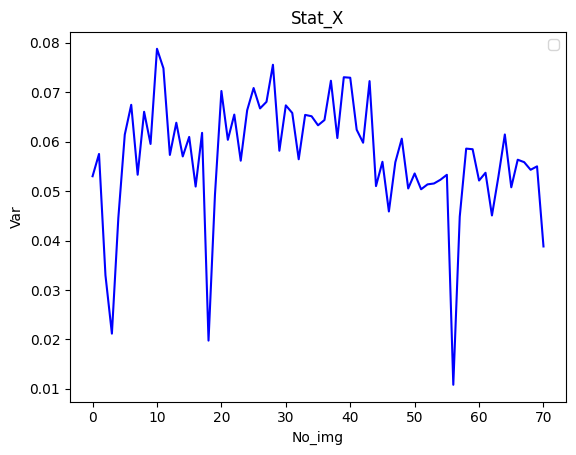

In [32]:
# Plotting multiple lines on a single plot
plt.plot(label_stat[:, 0], label_stat[:, 1], color='b')

# Adding labels and title
plt.xlabel('No_img')
plt.ylabel('Var')
plt.title('Stat_X')

# Displaying the legend and the plot
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


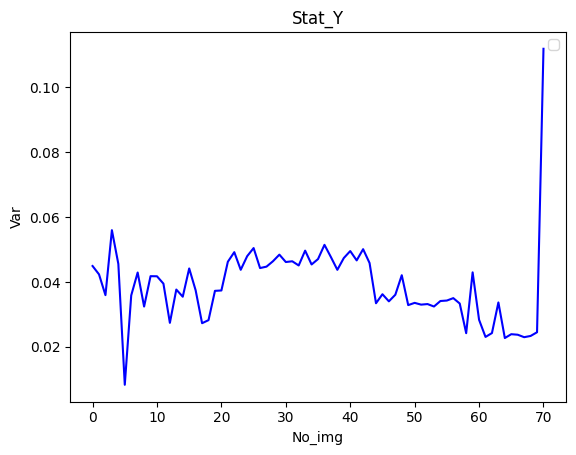

In [33]:
# Plotting multiple lines on a single plot
plt.plot(label_stat[:, 0], label_stat[:, 2], color='b')

# Adding labels and title
plt.xlabel('No_img')
plt.ylabel('Var')
plt.title('Stat_Y')

# Displaying the legend and the plot
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


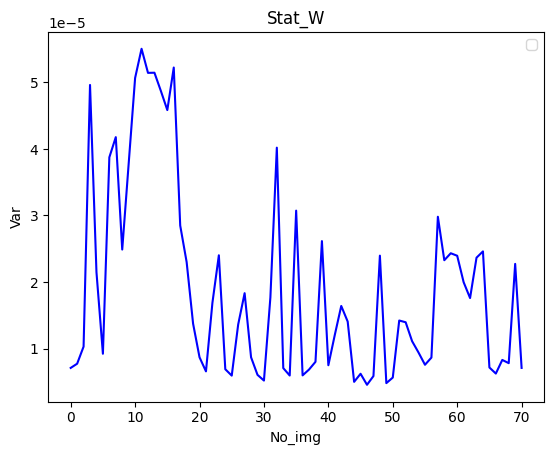

In [34]:
# Plotting multiple lines on a single plot
plt.plot(label_stat[:, 0], label_stat[:, 3], color='b')

# Adding labels and title
plt.xlabel('No_img')
plt.ylabel('Var')
plt.title('Stat_W')

# Displaying the legend and the plot
plt.legend()
plt.show()

=> khá nhỏ bỏ qua đc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


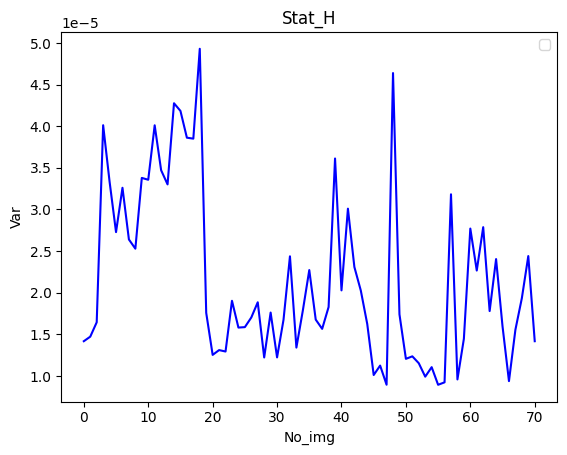

In [35]:
# Plotting multiple lines on a single plot
plt.plot(label_stat[:, 0], label_stat[:, 4], color='b')

# Adding labels and title
plt.xlabel('No_img')
plt.ylabel('Var')
plt.title('Stat_H')

# Displaying the legend and the plot
plt.legend()
plt.show()

=> cx khá nhỏ

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


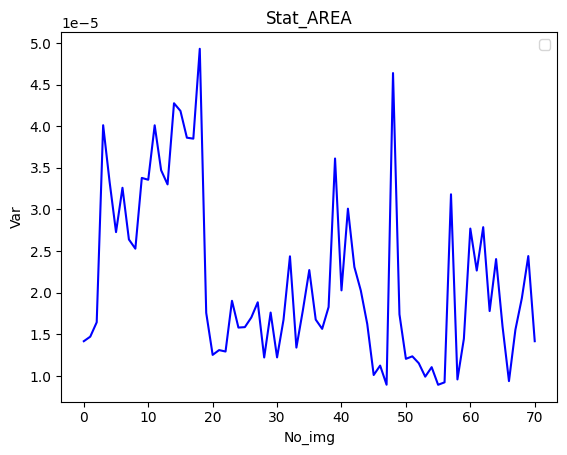

In [36]:
# Plotting multiple lines on a single plot
plt.plot(label_stat[:, 0], label_stat[:, 4], color='b')

# Adding labels and title
plt.xlabel('No_img')
plt.ylabel('Var')
plt.title('Stat_AREA')

# Displaying the legend and the plot
plt.legend()
plt.show()

=> khá nhỏ, tuy nhiên có sự chênh lệch size giữa các bounding box

#Tìm kiếm các ảnh bị quá nhiều ký tự tập trung

Hàm phân loại xem ảnh có phải bị lệch tập trung ko dựa vào tỉ lệ rate (phải đặt tham số)


*   Nhãn 1 sẽ là những ảnh được phát hiện có vấn đề nhiều hơn (như chỗ thưa và chỗ dày quá, phân bố không đều)
*   Nhãn 0 là ảnh đều và đẹp => chắc sẽ dễ train hơn



**RATE CÀNG CAO THÌ YÊU CẦU VỀ ĐỘ THƯA CÀNG CAO (tức là kiểu càng dễ bị gán nhãn là 1 hơn)**

In [37]:
def condition_classify(labels_folder, rate):
  overall_stat = []
  i = 1
  for filename in os.listdir(labels_folder):
    if filename.endswith(".txt"):
        label_file = os.path.join(labels_folder, filename)

        count_con_x_up = 0
        count_con_x_down = 0
        count_con_y_up = 0
        count_con_y_down = 0

        with open(label_file, "r") as f:
            coordinates = [line.strip().split()[1:] for line in f.readlines()]
            labels_list = np.array(coordinates)
            #đếm để xét đk
            thres = int(rate * labels_list.shape[0])

            pic_dat = []
            for coord in coordinates:
                # Split the coordinates
                x_upper_left, y_upper_left, x_below_right, y_below_right = map(float, coord)

                x = x_upper_left
                if (x > 0.5):
                  count_con_x_down +=1
                else:
                  count_con_x_up +=1

                y = y_upper_left
                if (y > 0.5):
                  count_con_y_down +=1
                else:
                  count_con_y_up +=1

        if (count_con_x_up < thres or count_con_x_down < thres or
            count_con_y_up < thres or count_con_y_down < thres):
          overall_stat.append([filename, 1])
        else:
          overall_stat.append([filename, 0])
        i += 1
  return np.array(overall_stat)

Ví dụ về rate = 0.3

In [51]:
label_stat2 = condition_classify("labels_new/train", 0.3)
label_stat2

array([['nlvnpf-0137-01-001.txt', '0'],
       ['nlvnpf-0137-01-002.txt', '0'],
       ['nlvnpf-0137-01-003.txt', '1'],
       ['nlvnpf-0137-01-004.txt', '1'],
       ['nlvnpf-0137-01-005.txt', '0'],
       ['nlvnpf-0137-01-006.txt', '1'],
       ['nlvnpf-0137-01-007.txt', '0'],
       ['nlvnpf-0137-01-008.txt', '0'],
       ['nlvnpf-0137-01-009.txt', '0'],
       ['nlvnpf-0137-01-010.txt', '0'],
       ['nlvnpf-0137-01-011.txt', '0'],
       ['nlvnpf-0137-01-012.txt', '0'],
       ['nlvnpf-0137-01-013.txt', '0'],
       ['nlvnpf-0137-01-014.txt', '0'],
       ['nlvnpf-0137-01-015.txt', '0'],
       ['nlvnpf-0137-01-016.txt', '0'],
       ['nlvnpf-0137-01-017.txt', '0'],
       ['nlvnpf-0137-01-018.txt', '0'],
       ['nlvnpf-0137-01-019.txt', '1'],
       ['nlvnpf-0137-01-020.txt', '1'],
       ['nlvnpf-0137-01-021.txt', '1'],
       ['nlvnpf-0137-01-022.txt', '0'],
       ['nlvnpf-0137-01-023.txt', '0'],
       ['nlvnpf-0137-01-024.txt', '0'],
       ['nlvnpf-0137-01-025.txt', '0'],


In [39]:
count_bias = np.count_nonzero(label_stat2[:, 1] == '1')
count_bias

10

In [53]:
imgs_3 = condition_classify("labels_new/train", 0.3)
boolean_filter = (imgs_3[:, 1] == '1')
name_imgs_3 = imgs_3[boolean_filter]
print(name_imgs_3[:, 0])

['nlvnpf-0137-01-003.txt' 'nlvnpf-0137-01-004.txt'
 'nlvnpf-0137-01-006.txt' 'nlvnpf-0137-01-019.txt'
 'nlvnpf-0137-01-020.txt' 'nlvnpf-0137-01-021.txt'
 'nlvnpf-0140-01-006.txt' 'nlvnpf-0140-01-014.txt'
 'nlvnpf-0174-03-012.txt' 'test.txt']


Bây giờ ta sẽ thực hiện sinh ra bộ tên ảnh với từng rate lần lượt là 0.325, 0.35 và 0.4

Rate = 0.325

In [48]:
imgs_325 = condition_classify("labels_new/train", 0.325)
boolean_filter = (imgs_325[:, 1] == '1')
name_imgs_325 = imgs_325[boolean_filter]
print(name_imgs_325[:, 0])

['nlvnpf-0137-01-003.txt' 'nlvnpf-0137-01-004.txt'
 'nlvnpf-0137-01-006.txt' 'nlvnpf-0137-01-008.txt'
 'nlvnpf-0137-01-015.txt' 'nlvnpf-0137-01-018.txt'
 'nlvnpf-0137-01-019.txt' 'nlvnpf-0137-01-020.txt'
 'nlvnpf-0137-01-021.txt' 'nlvnpf-0140-01-006.txt'
 'nlvnpf-0140-01-014.txt' 'nlvnpf-0174-03-010.txt'
 'nlvnpf-0174-03-011.txt' 'nlvnpf-0174-03-012.txt' 'test.txt']


Rate = 0.35

In [54]:
imgs_35 = condition_classify("labels_new/train", 0.35)
boolean_filter = (imgs_35[:, 1] == '1')
name_imgs_35 = imgs_35[boolean_filter]
print(name_imgs_35[:, 0])

['nlvnpf-0137-01-003.txt' 'nlvnpf-0137-01-004.txt'
 'nlvnpf-0137-01-006.txt' 'nlvnpf-0137-01-008.txt'
 'nlvnpf-0137-01-009.txt' 'nlvnpf-0137-01-015.txt'
 'nlvnpf-0137-01-018.txt' 'nlvnpf-0137-01-019.txt'
 'nlvnpf-0137-01-020.txt' 'nlvnpf-0137-01-021.txt'
 'nlvnpf-0137-01-027.txt' 'nlvnpf-0137-01-033.txt'
 'nlvnpf-0137-01-039.txt' 'nlvnpf-0140-01-006.txt'
 'nlvnpf-0140-01-014.txt' 'nlvnpf-0174-03-001.txt'
 'nlvnpf-0174-03-008.txt' 'nlvnpf-0174-03-009.txt'
 'nlvnpf-0174-03-010.txt' 'nlvnpf-0174-03-011.txt'
 'nlvnpf-0174-03-012.txt' 'test.txt']


Rate = 0.4

In [46]:
imgs_4 = condition_classify("labels_new/train", 0.4)
boolean_filter = (imgs_4[:, 1] == '1')
name_imgs_4 = imgs_4[boolean_filter]
print(name_imgs_4[:, 0])

['nlvnpf-0137-01-001.txt' 'nlvnpf-0137-01-003.txt'
 'nlvnpf-0137-01-004.txt' 'nlvnpf-0137-01-005.txt'
 'nlvnpf-0137-01-006.txt' 'nlvnpf-0137-01-007.txt'
 'nlvnpf-0137-01-008.txt' 'nlvnpf-0137-01-009.txt'
 'nlvnpf-0137-01-010.txt' 'nlvnpf-0137-01-015.txt'
 'nlvnpf-0137-01-017.txt' 'nlvnpf-0137-01-018.txt'
 'nlvnpf-0137-01-019.txt' 'nlvnpf-0137-01-020.txt'
 'nlvnpf-0137-01-021.txt' 'nlvnpf-0137-01-025.txt'
 'nlvnpf-0137-01-027.txt' 'nlvnpf-0137-01-028.txt'
 'nlvnpf-0137-01-030.txt' 'nlvnpf-0137-01-033.txt'
 'nlvnpf-0137-01-037.txt' 'nlvnpf-0137-01-038.txt'
 'nlvnpf-0137-01-039.txt' 'nlvnpf-0137-01-040.txt'
 'nlvnpf-0140-01-006.txt' 'nlvnpf-0140-01-009.txt'
 'nlvnpf-0140-01-014.txt' 'nlvnpf-0140-01-015.txt'
 'nlvnpf-0174-03-001.txt' 'nlvnpf-0174-03-004.txt'
 'nlvnpf-0174-03-005.txt' 'nlvnpf-0174-03-008.txt'
 'nlvnpf-0174-03-009.txt' 'nlvnpf-0174-03-010.txt'
 'nlvnpf-0174-03-011.txt' 'nlvnpf-0174-03-012.txt' 'test.txt']


Rate = 0.375

In [49]:
imgs_375 = condition_classify("labels_new/train", 0.375)
boolean_filter = (imgs_375[:, 1] == '1')
name_imgs_375 = imgs_375[boolean_filter]
print(name_imgs_375[:, 0])

['nlvnpf-0137-01-001.txt' 'nlvnpf-0137-01-003.txt'
 'nlvnpf-0137-01-004.txt' 'nlvnpf-0137-01-006.txt'
 'nlvnpf-0137-01-008.txt' 'nlvnpf-0137-01-009.txt'
 'nlvnpf-0137-01-015.txt' 'nlvnpf-0137-01-017.txt'
 'nlvnpf-0137-01-018.txt' 'nlvnpf-0137-01-019.txt'
 'nlvnpf-0137-01-020.txt' 'nlvnpf-0137-01-021.txt'
 'nlvnpf-0137-01-027.txt' 'nlvnpf-0137-01-030.txt'
 'nlvnpf-0137-01-033.txt' 'nlvnpf-0137-01-039.txt'
 'nlvnpf-0140-01-006.txt' 'nlvnpf-0140-01-009.txt'
 'nlvnpf-0140-01-014.txt' 'nlvnpf-0174-03-001.txt'
 'nlvnpf-0174-03-004.txt' 'nlvnpf-0174-03-005.txt'
 'nlvnpf-0174-03-008.txt' 'nlvnpf-0174-03-009.txt'
 'nlvnpf-0174-03-010.txt' 'nlvnpf-0174-03-011.txt'
 'nlvnpf-0174-03-012.txt' 'test.txt']
